In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')
import missingno
from sklearn.preprocessing import LabelEncoder
import re

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Caba2012/cakd1_project/p3_2

/content/drive/.shortcut-targets-by-id/1DgqCdGjH-Do4g1EBoj-rVW9AGMQvVxQ-/Caba2012/cakd1_project/p3_2


In [ ]:
df = pd.read_csv('Demo_최종_모델검증.csv', encoding='euckr')
df

,ORDERID,SOLDDATE,CUSTID,PRODID,PRODNAME,WEEKDAY,SITEBUSNAME,REGION,D_DAY_2_TEM,D_DAY_2_HUM,D_DAY_2_WIND,D_DAY_2_TEM_RAINAMOUNT,D_DAY_2_RAINHOUR,ORDER_QUANT,SOLD_QUANT
0,AE21030434,2021-03-07,2007400,SSA013035307,AE,목,삼표,풍납,6.6,58.5,2.2,0.0,0.00,532,1000
1,HR1021030423,2021-03-07,2001500,PEMA363048300,PEMA-HR1000,목,제일,홍성,5.5,65.0,0.9,0.0,0.00,5184,6000
2,HR1021030426,2021-03-07,2001600,PEMA093001100,PEMA-HR1000,목,동해,동해,8.1,62.1,2.1,0.0,0.00,10032,8000
3,HR1021030427,2021-03-07,2001700,PEMA093001100,PEMA-HR1000,목,동해,동해,8.1,62.1,2.1,0.0,0.00,1344,2000
4,HR1521030432,2021-03-07,2002800,PEMA053046500,PEMA-HR1500,목,신일,송파,6.6,58.5,2.2,0.0,0.00,6260,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,HR1021032444_210127,2021-01-30,2002400,PEMA023024801,PEMA-HR1000,수,동진,수원,5.0,89.0,2.2,1.7,5.08,3259,3650
24212,HR1521032423_210127,2021-01-30,2003100,PEMA013082100,PEMA-HR1500,수,대원씨앤엠,울산,10.6,75.9,2.5,12.1,8.25,11563,10950
24213,AE21032452_210127,2021-01-30,2006606,SSA073046500,AE,수,신일,송파,5.0,74.5,2.7,0.7,0.83,1892,1460
24214,HR1021032428_210127,2021-01-30,2001400,PEMA013128300,PEMA-HR1000,수,경연,원주,5.0,75.6,1.2,1.9,0.00,1682,1460


In [ ]:
adf = df.copy()

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# 독립변수, 종속변수 분리
y_t_df = adf['SOLD_QUANT'] # 종속변수
X_t_df = adf[['ORDER_QUANT']] # 종속변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 11)

print(X_train.shape)
print(X_test.shape)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.6f}'.format(r2_score(y_test, y_preds)))

(19372, 1)
(4844, 1)
MSE : 3848680.017 , RMSE : 1961.805
Variance score : 0.719776


#변수개발

## 월별 평균온도 (18~21년)

In [ ]:
# 월별 평균 온도
df['SOLDDATE'] = pd.to_datetime(df['SOLDDATE'],format= '%Y-%m-%d')
df['month']= df.SOLDDATE.dt.month
df.groupby('month')['D_DAY_2_TEM'].mean().round(2)

month
1      0.95
2      3.42
3      8.20
4     12.67
5     18.33
6     22.52
7     24.52
8     26.37
9     21.13
10    14.29
11     7.40
12     0.86
Name: D_DAY_2_TEM, dtype: float64

,ORDERID,SOLDDATE,CUSTID,PRODID,PRODNAME,WEEKDAY,SITEBUSNAME,REGION,D_DAY_2_TEM,D_DAY_2_HUM,D_DAY_2_WIND,D_DAY_2_TEM_RAINAMOUNT,D_DAY_2_RAINHOUR,ORDER_QUANT,SOLD_QUANT,month,m_temp
0,AE21030434,2021-03-07,2007400,SSA013035307,AE,목,삼표,풍납,6.6,58.5,2.2,0.0,0.00,532,1000,3,8.197
1,HR1021030423,2021-03-07,2001500,PEMA363048300,PEMA-HR1000,목,제일,홍성,5.5,65.0,0.9,0.0,0.00,5184,6000,3,8.197
2,HR1021030426,2021-03-07,2001600,PEMA093001100,PEMA-HR1000,목,동해,동해,8.1,62.1,2.1,0.0,0.00,10032,8000,3,8.197
3,HR1021030427,2021-03-07,2001700,PEMA093001100,PEMA-HR1000,목,동해,동해,8.1,62.1,2.1,0.0,0.00,1344,2000,3,8.197
4,HR1521030432,2021-03-07,2002800,PEMA053046500,PEMA-HR1500,목,신일,송파,6.6,58.5,2.2,0.0,0.00,6260,5000,3,8.197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,HR1021032444_210127,2021-01-30,2002400,PEMA023024801,PEMA-HR1000,수,동진,수원,5.0,89.0,2.2,1.7,5.08,3259,3650,1,0.952
24212,HR1521032423_210127,2021-01-30,2003100,PEMA013082100,PEMA-HR1500,수,대원씨앤엠,울산,10.6,75.9,2.5,12.1,8.25,11563,10950,1,0.952
24213,AE21032452_210127,2021-01-30,2006606,SSA073046500,AE,수,신일,송파,5.0,74.5,2.7,0.7,0.83,1892,1460,1,0.952
24214,HR1021032428_210127,2021-01-30,2001400,PEMA013128300,PEMA-HR1000,수,경연,원주,5.0,75.6,1.2,1.9,0.00,1682,1460,1,0.952


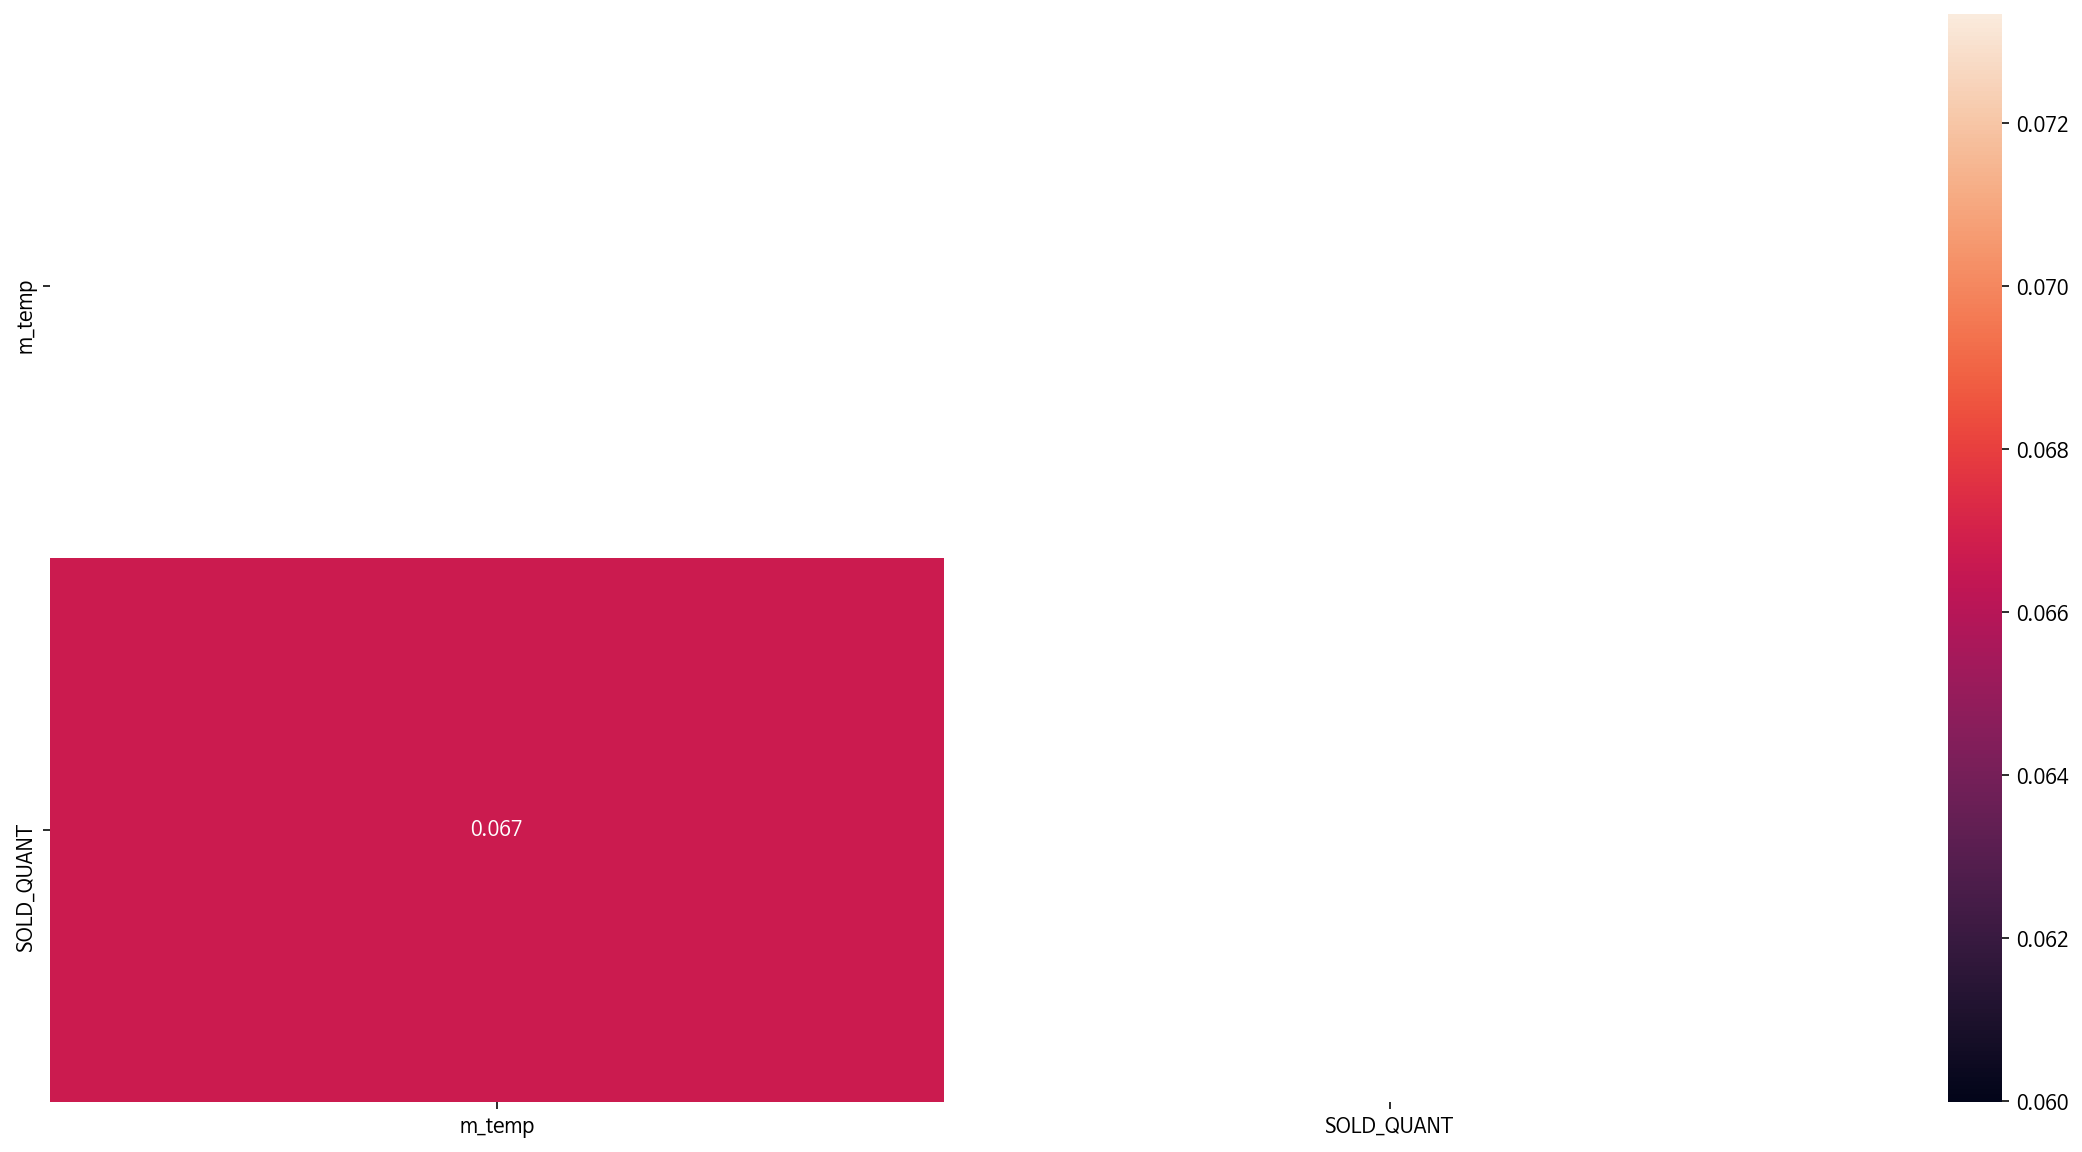

In [ ]:
# 월별 평균 온도 (18~21년)

df['SOLDDATE'] = pd.to_datetime(df['SOLDDATE'],format= '%Y-%m-%d')
def m_temp(x):
    if x.month in [1]: return 0.952
    elif x.month in [2]: return 3.423
    elif x.month in [3]: return 8.197
    elif x.month in [4]: return 12.668
    elif x.month in [5]: return 18.327
    elif x.month in [6]: return 22.522
    elif x.month in [7]: return 24.52
    elif x.month in [8]: return 26.372
    elif x.month in [9]: return 21.134
    elif x.month in [10]: return 14.293
    elif x.month in [11]: return 7.403
    elif x.month in [12]: return 0.858
    
    

df['m_temp'] = df.SOLDDATE.apply(m_temp)
temp = df[['m_temp','SOLD_QUANT']]
# m_temp_dummies = pd.get_dummies(temp.m_temp) 
# temp = pd.concat([temp,m_temp_dummies], axis = 1)
corr = temp.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, annot=True)
df

## 월별 평균강수량

In [ ]:
# 월별 평균 강수량
df.groupby('month')['D_DAY_2_TEM_RAINAMOUNT'].mean().round(2)


month
1      1.38
2      2.18
3      1.29
4      2.63
5      3.60
6      4.40
7     10.68
8      9.72
9      6.09
10     0.71
11     1.41
12     0.62
Name: D_DAY_2_TEM_RAINAMOUNT, dtype: float64

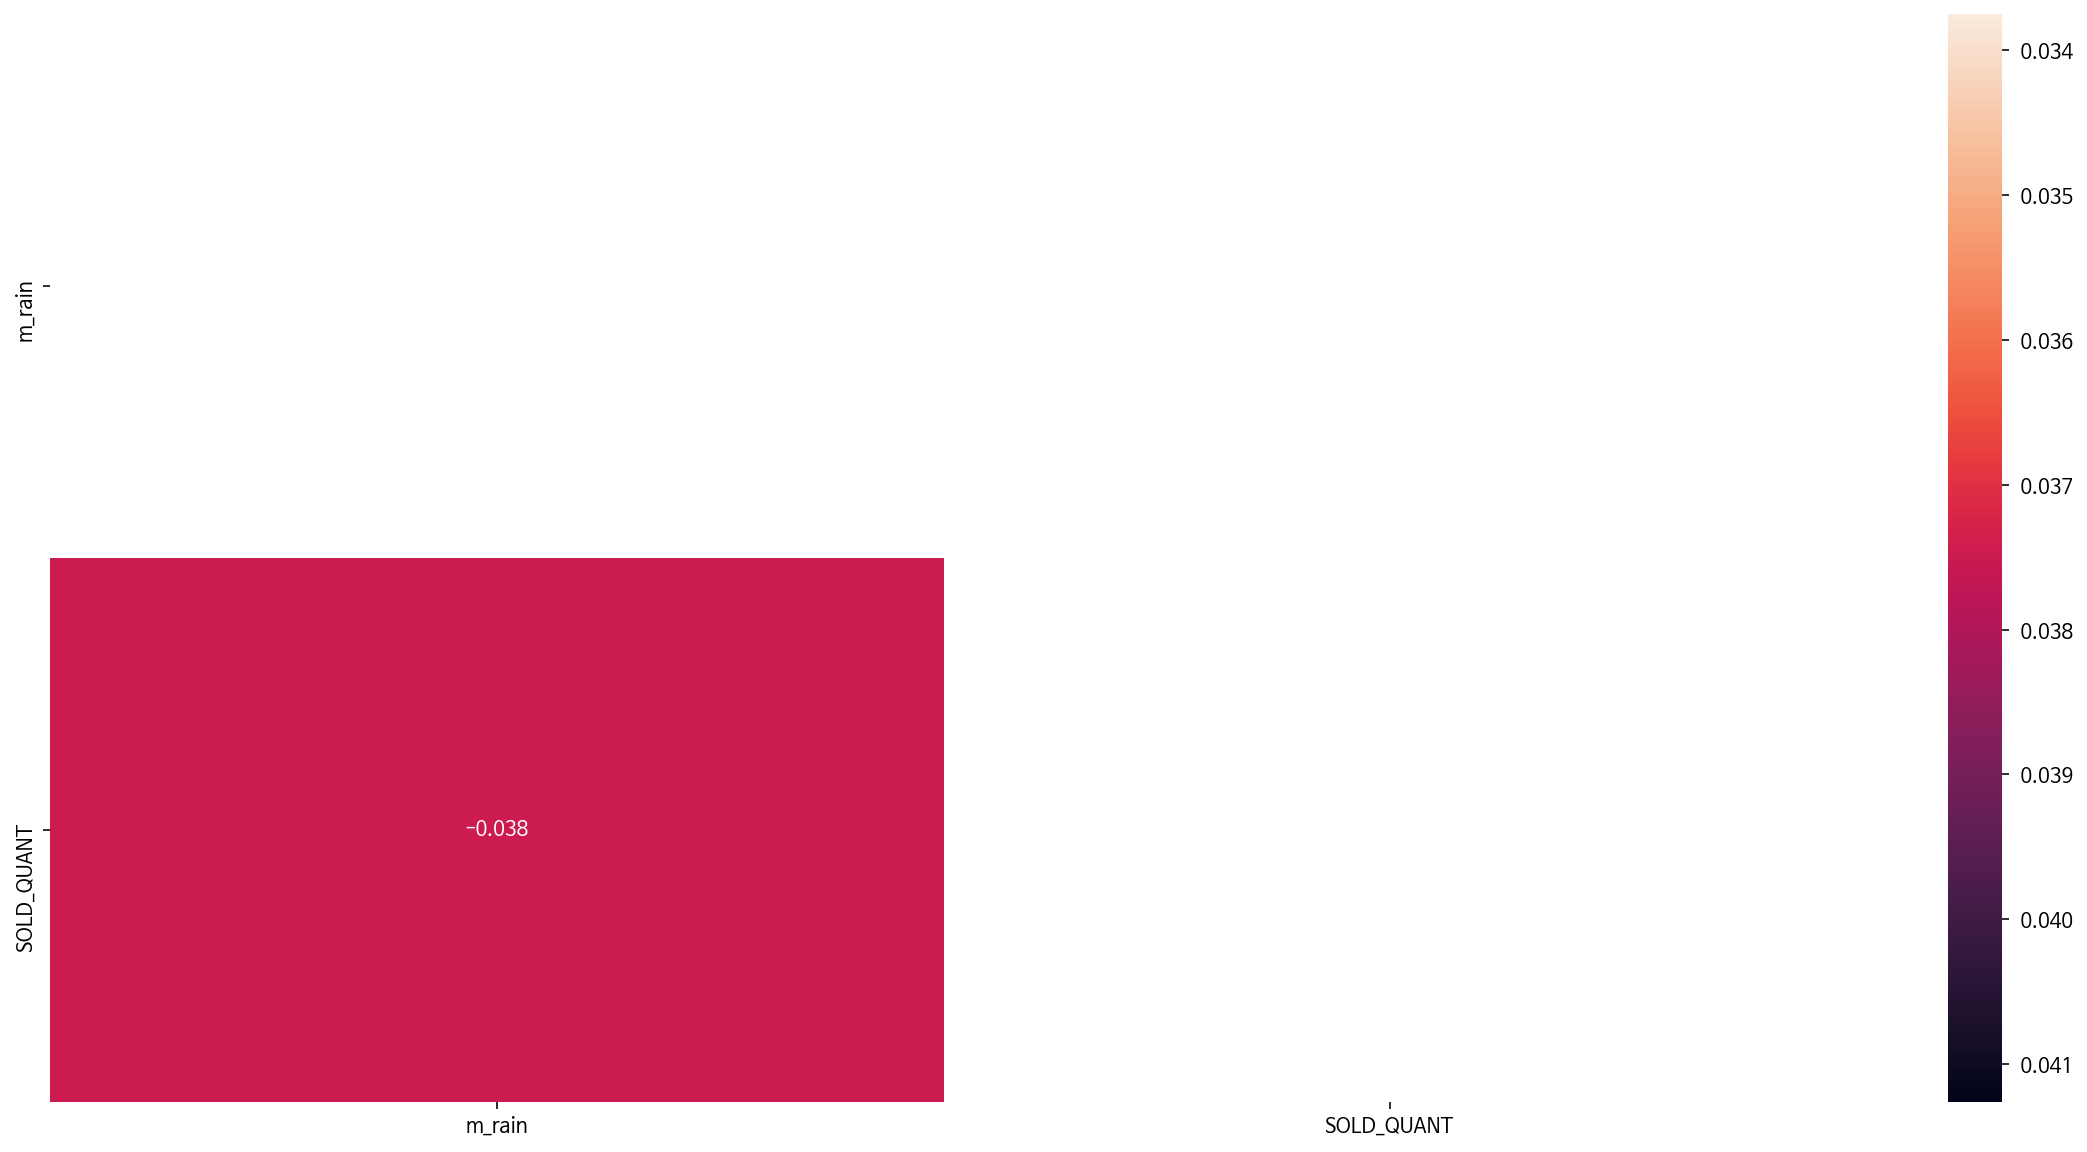

In [ ]:
# 월별 평균강수량 (18~21년)
def m_rain(x):
    if x.month in [1]: return 1.375
    elif x.month in [2]: return 2.182
    elif x.month in [3]: return 1.292
    elif x.month in [4]: return 2.629
    elif x.month in [5]: return 3.597
    elif x.month in [6]: return 4.404
    elif x.month in [7]: return 10.681
    elif x.month in [8]: return 9.717
    elif x.month in [9]: return 6.087
    elif x.month in [10]: return 0.708
    elif x.month in [11]: return 1.412
    elif x.month in [12]: return 0.616

df['m_rain'] = df.SOLDDATE.apply(m_rain)

rain = df[['m_rain','SOLD_QUANT']]
# rainClass_dummies = pd.get_dummies(rain.rainClass) 
# rain = pd.concat([rain,rainClass_dummies], axis = 1)

corr = rain.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, annot=True)

In [ ]:
df = df.drop('month',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24216 entries, 0 to 24215
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ORDERID                 24216 non-null  object        
 1   SOLDDATE                24216 non-null  datetime64[ns]
 2   CUSTID                  24216 non-null  int64         
 3   PRODID                  24216 non-null  object        
 4   PRODNAME                24216 non-null  object        
 5   WEEKDAY                 24216 non-null  object        
 6   SITEBUSNAME             24216 non-null  object        
 7   REGION                  24216 non-null  object        
 8   D_DAY_2_TEM             24216 non-null  float64       
 9   D_DAY_2_HUM             24216 non-null  float64       
 10  D_DAY_2_WIND            24216 non-null  float64       
 11  D_DAY_2_TEM_RAINAMOUNT  24216 non-null  float64       
 12  D_DAY_2_RAINHOUR        24216 non-null  float6

##월별 범주화

In [ ]:
# # 월별 범주화
# def Month(x):
#     if x.month in [1]: return 'Jan_r'
#     elif x.month in [2]: return 'Feb_r'
#     elif x.month in [3]: return 'Mar_r'
#     elif x.month in [4]: return 'Apr_r'
#     elif x.month in [5]: return 'May_r'
#     elif x.month in [6]: return 'Jun_r'
#     elif x.month in [7]: return 'Jul_r'
#     elif x.month in [8]: return 'Aug_r'
#     elif x.month in [9]: return 'Sep_r'
#     elif x.month in [10]: return 'Oct_r'
#     elif x.month in [11]: return 'Nov_r'
#     elif x.month in [12]: return 'Dec_r'

# df['Month'] = df.SOLDDATE.apply(Month)

## 요일 그룹화

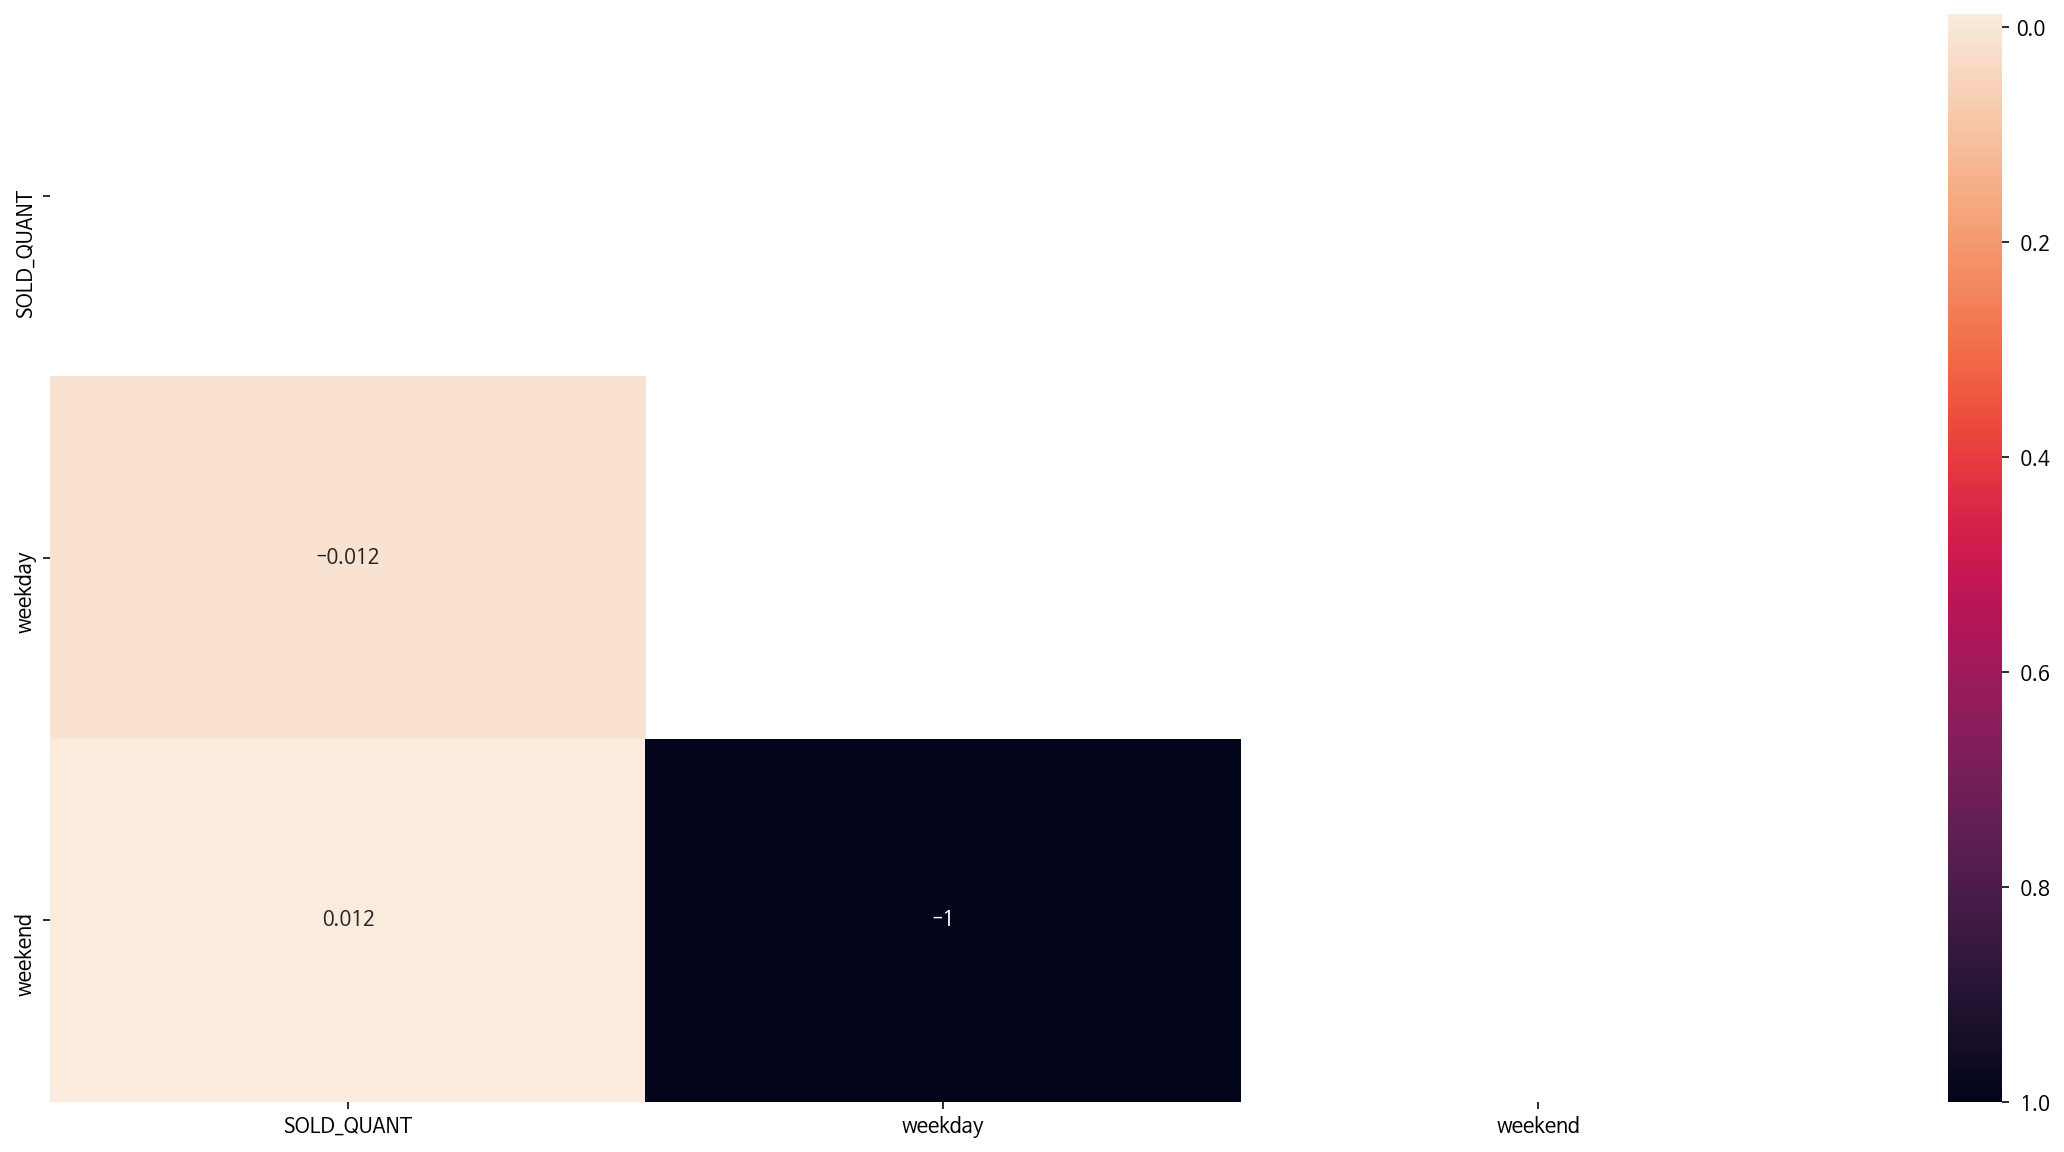

In [ ]:
def weekday(x):
    if x in ['일','금']: return 'weekend'
    elif x in ['월','화','수','목']: return 'weekday'

df['weekdayClass'] = df.WEEKDAY.apply(weekday)
week = df[['weekdayClass','SOLD_QUANT']]
weekday_dummies = pd.get_dummies(week.weekdayClass) 
week = pd.concat([week,weekday_dummies], axis = 1)
corr = week.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, annot=True)

# week = df[['WEEKDAY','SOLD_QUANT']]
# weekday_dummies = pd.get_dummies(week.WEEKDAY) 
# week = pd.concat([week,weekday_dummies], axis = 1)
# corr = week.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True
# plt.figure(figsize=(20,10))
# sns.heatmap(corr, mask=mask, annot=True)

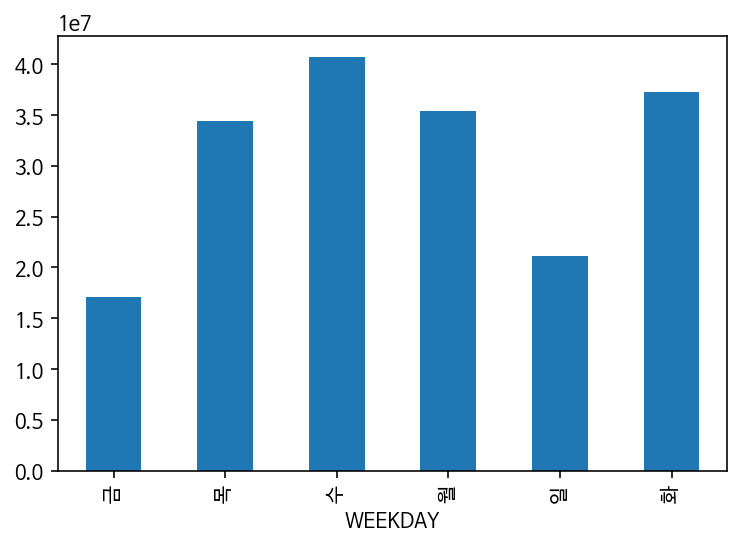

In [ ]:
# 요일별 수주량 비교
df.groupby('WEEKDAY')['SOLD_QUANT'].sum()
df.groupby('WEEKDAY')['SOLD_QUANT'].sum().plot(kind='bar')

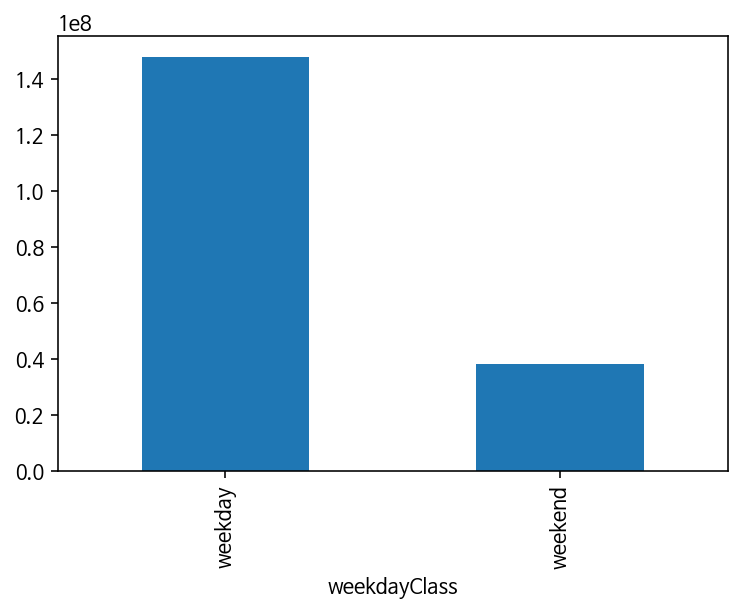

In [ ]:
df.groupby('weekdayClass')['SOLD_QUANT'].sum().plot(kind='bar')

##계절변수


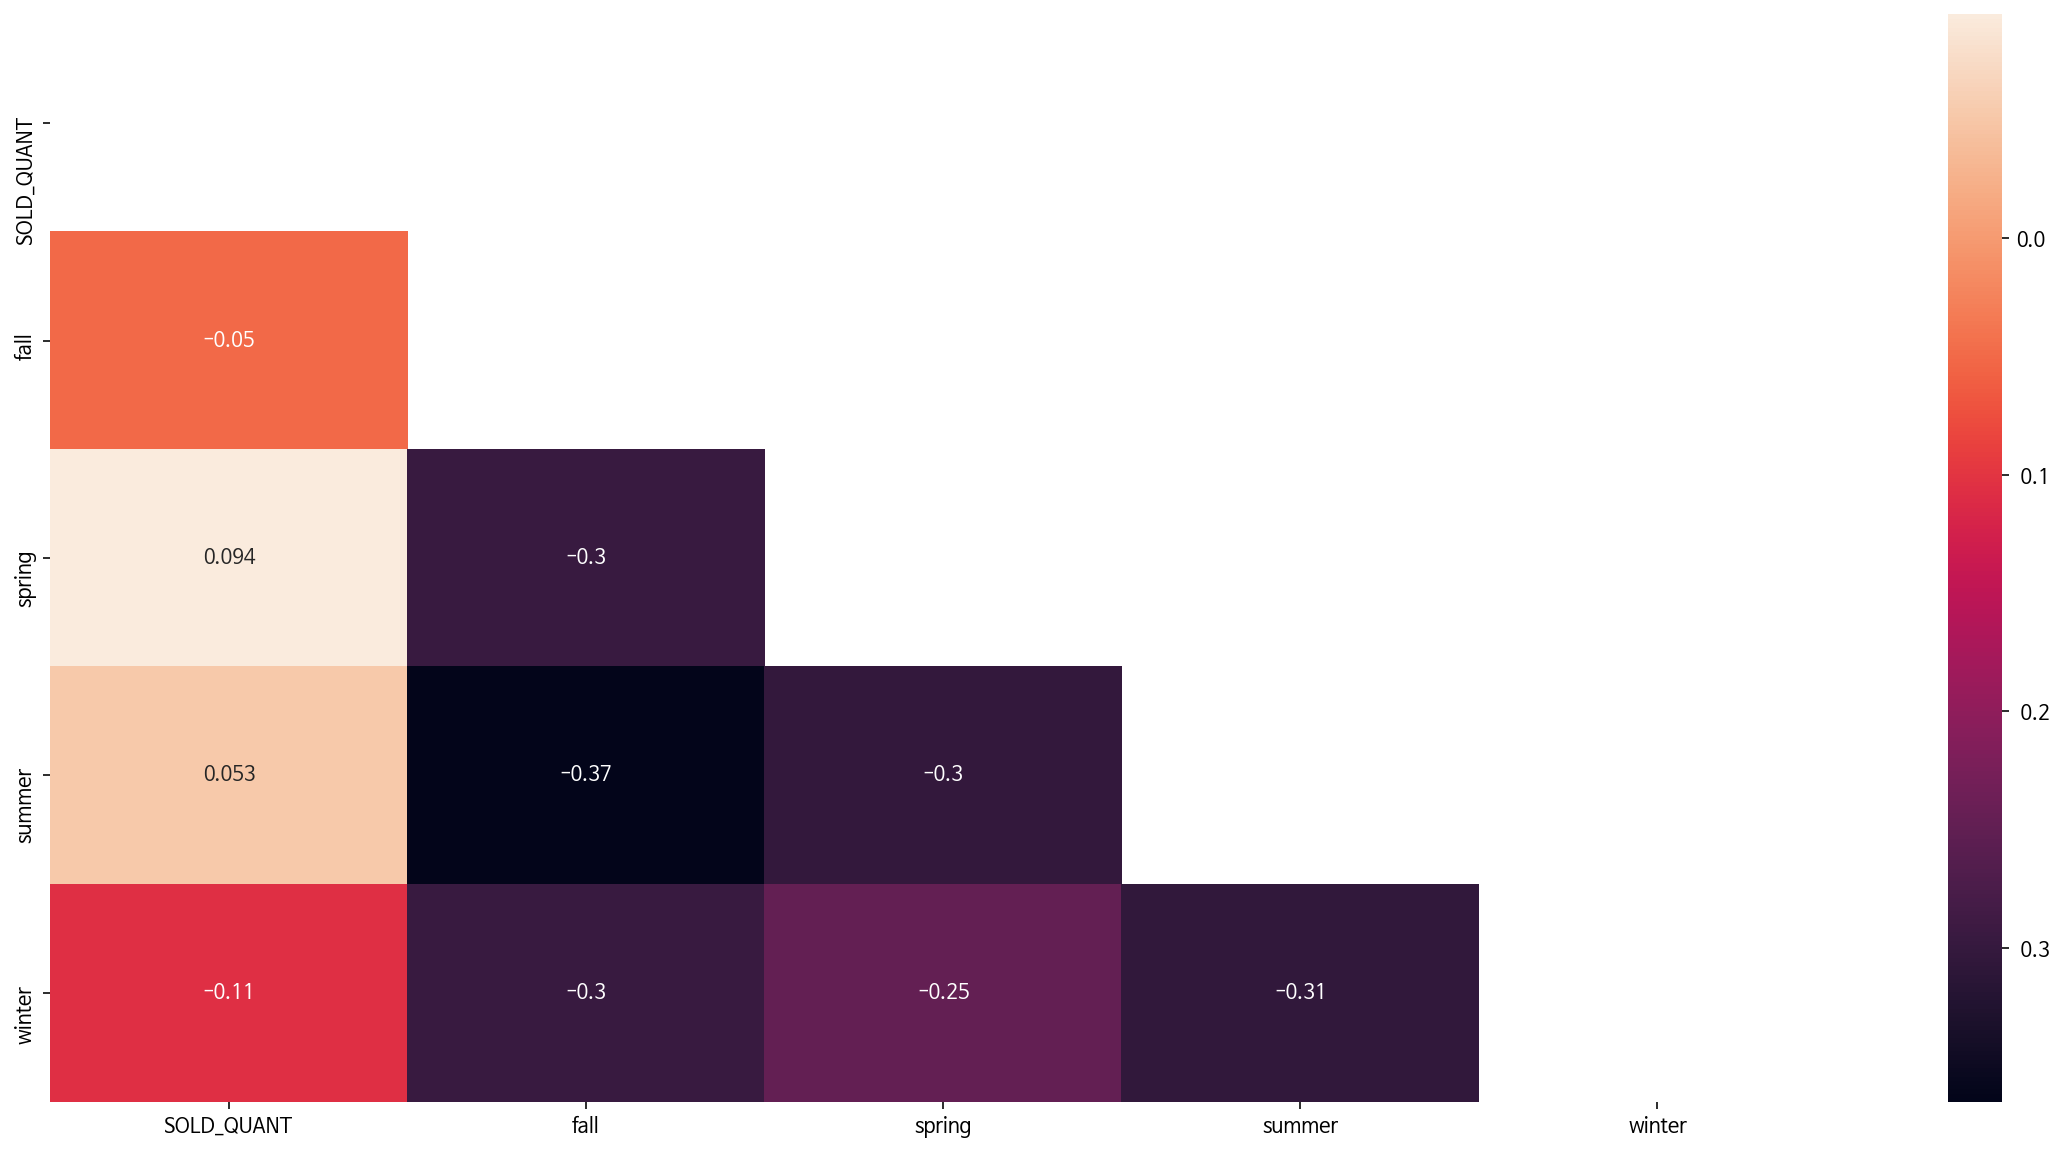

In [ ]:
df['SOLDDATE'] = pd.to_datetime(df['SOLDDATE'],format= '%Y-%m-%d')
def season(x):
    if x.month in [3,4]: return 'spring'
    elif x.month in [5,6,7,8]: return 'summer'
    elif x.month in [9,1,11]: return 'fall'
    elif x.month in [12,1,2]: return 'winter'

df['season'] = df.SOLDDATE.apply(season)
season = df[['season','SOLD_QUANT']]
season_dummies = pd.get_dummies(season.season) 
season = pd.concat([season,season_dummies], axis = 1)
corr = season.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, annot=True)

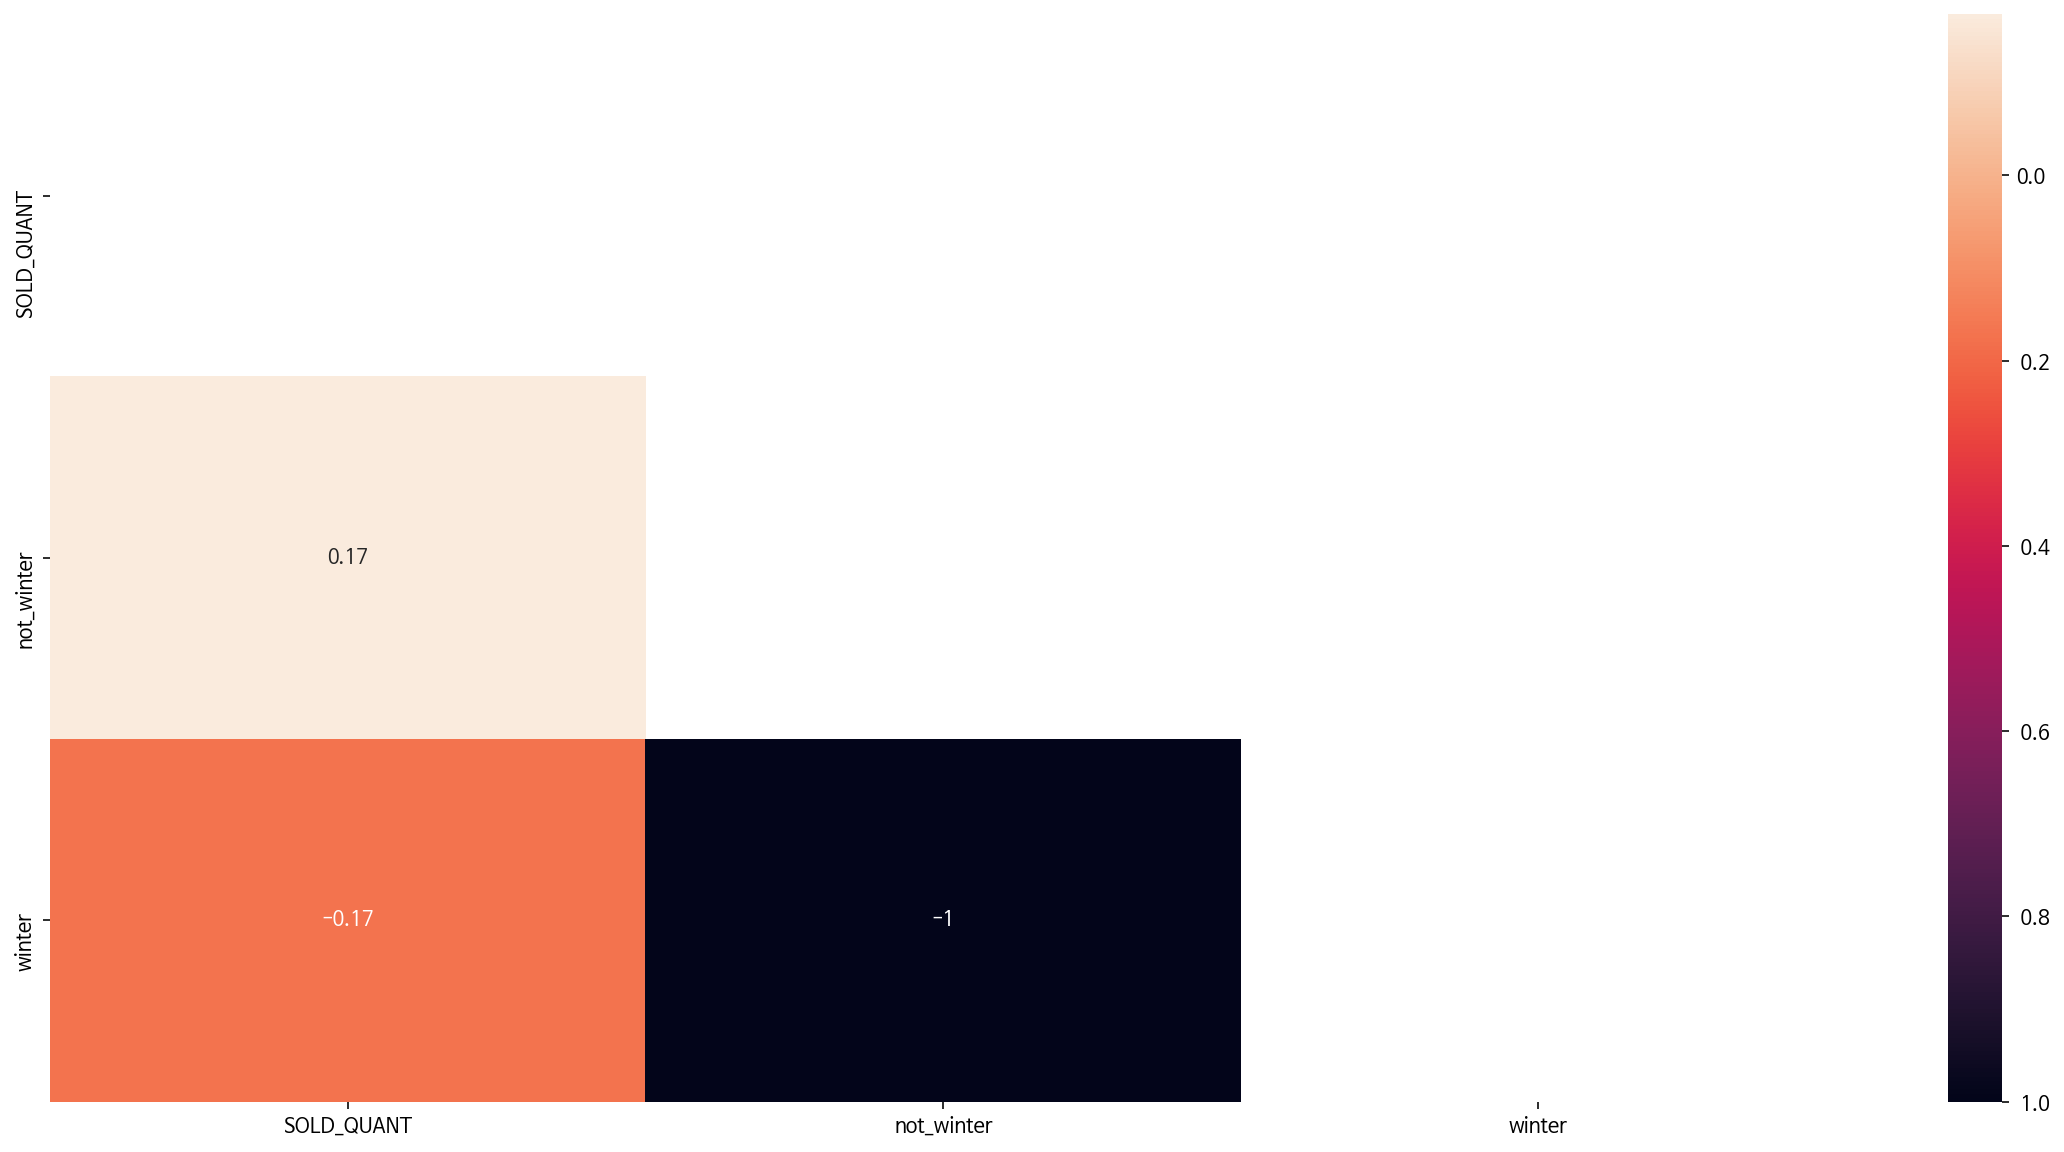

In [ ]:
df['SOLDDATE'] = pd.to_datetime(df['SOLDDATE'],format= '%Y-%m-%d')
def season(x):
    if x.month in [3,4,5,6,7,8,9,10,11]: return 'not_winter'
    elif x.month in [12,1,2]: return 'winter'

df['season'] = df.SOLDDATE.apply(season)
season = df[['season','SOLD_QUANT']]
season_dummies = pd.get_dummies(season.season) 
season = pd.concat([season,season_dummies], axis = 1)
corr = season.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, annot=True)

##지역 범주화

In [ ]:
def dododo(x):
    if x in ['성수','서울','송파','동서울', '이서', '풍납', '남부', '강서', '남서울','신림']: return '서울'
    
    elif x in ['수원','화성', '안양', '의왕', '용인', '영동', '동탄', '오산', '안산', '성남','천안', '평택', '천안','이천','여주','광주', '이천',\
               '안성', '옥산','동두천', '포천', '동두천', '양주', '의정부', '포천','양평','남양주', '구리', '하남', '진접', '덕소', '진영',\
               '파주', '고양', '일산','부천','김포','광명','미사리','비봉']: return '경기도'
    
    elif x in ['사천', '진주', '가좌','광양시','하동', '광양','산청','의령군', '함안', '의령', '창녕', '대산', '칠서',\
               '김해시','김해','함양군','함양','합천','마산', '진해', '창원','밀양', '창녕','양산시','양산','진주','사천',\
               '통영', '고성', '남포항','화도']: return '경상남도'
    
    elif x in ['의성','단촌','구미','약목', '옥계', '군위', '성주', '칠곡','영덕','울진','안동', '예천', '영양',\
               '영천','경산','포항','장흥','경주','문경','경산','고령']: return '경상북도'
    
    elif x in ['순창군' ,'담양', '순창','고창','장성','해남','여수','영광군',\
               '영광','목포', '무안', '해남','순천', '구례','장흥','나주','회주','완도','노화도','경광주','화순']: return '전라남도'
    
    elif x in ['익산', '군산', '군산한전주', '익산','전주','장수','전주', '완주','부안',\
               '남원','오수','임실','장성','정읍']: return '전라북도'
    
    elif x in ['서산', '당진', '태안','천안', '공주', '아산','금산','부여',\
               '청양', '논산', '계룡','홍성','천북', '보령','세종','연기','예산']: return '충청남도'
    
    elif x in ['청주', '청원', '옥천', '진천','제천','단양','성주','영동','충주', '음성','보은']: return '충청북도'
    
    elif x in ['홍성','북춘천', '춘천','원주','양양', '강릉','동해', '삼척','원주','횡성','속초','고성', '양양',\
               '정선군', '평창','영월','철원','현림수로']: return '강원도'
    
    elif x in ['대전광역시','대전','장동']: return '대전'
    
    elif x in ['대구','하빈']: return '대구'
    
    elif x in ['인천','송도','서인천']: return '인천'
    
    elif x in ['부산','회동동','서부산','신평','정관']: return '부산'
    
    elif x in ['울산','온산','언양',]: return '울산'
    
    elif x in ['세종']: return '세종'
    
    
    
df['DO'] = df.REGION.apply(dododo)

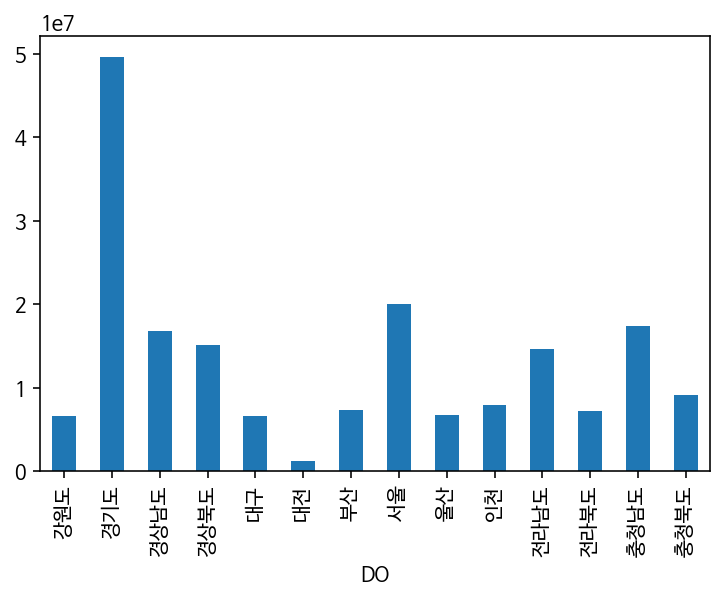

In [ ]:
df.groupby('DO')['SOLD_QUANT'].sum().plot(kind='bar')

In [ ]:
df.columns

Index(['ORDERID', 'SOLDDATE', 'CUSTID', 'PRODID', 'PRODNAME', 'WEEKDAY',
       'SITEBUSNAME', 'REGION', 'D_DAY_2_TEM', 'D_DAY_2_HUM', 'D_DAY_2_WIND',
       'D_DAY_2_TEM_RAINAMOUNT', 'D_DAY_2_RAINHOUR', 'ORDER_QUANT',
       'SOLD_QUANT', 'm_temp', 'm_rain', 'weekdayClass', 'season', 'DO'],
      dtype='object')

## 거래 회사 변수

In [ ]:
SITEBUS_label = df['SITEBUSNAME']
SITEBUS_label.unique()

array(['삼표', '제일', '동해', '신일', '삼영씨앤텍', '천마', '서산', '보광', '미륭', '경동',
       '유진', '성진', '석문', '에스피', '장헌', '아주', '성원', '서보', '정선', '태명',
       '동진파일', '대동', '동양파일', '성우', '일진', '한국흄관', '장원', '쌍용', '동양건재', '우진',
       '파워텍', '동양', '신공항', '대안', '동진', '동원', '강원', '삼일', '경연', '영동', '하나',
       '세진', '모헨즈', '서원', '부산', '영진', '한진', '한라', '대종', '도현', '부일', '황원',
       '명진', '하주', '상신', '삼우', '흥국', '일양', '아세아', '신진', '성진도시', '청명',
       '구산', '대아', '신우', '서우', '우성', '구암', '산양', '울산', '대경', '대신', '정도',
       '영남', '동아', '디엘이앤씨', '대원', '고려', '현대', '태명실업', '선일', '한선', '흥진',
       '부국', '미래', '대원씨엔엠', '한양', '동서', '대성', '태성', '만수', '성창', '성보',
       '대원씨앤엠', '진영', '인천', '이순', '삼호', '남광', '물금', '산하', '아이에스', '서전',
       '신아', '삼덕', '태양', '나성', '대상', '우림', '한덕', '삼성', '우신', '케이와이', '바나',
       '하남', '에스지이', '한일', '윤성', '부청', '양지', '항도렉스콘', '승일', '남부', '푸른',
       '중원', '우현', '우리도시', '은성', '원신', '한성', '삼보', '대산', '세종', '선진', '금남',
       '남도', '서문', '유니캠', '해양개발', '상동', '동림', '관악', '진남', '

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(SITEBUS_label)
SITEBUS_L_encoded = le.transform(SITEBUS_label)
df['SITEBUS_L_encoded'] = SITEBUS_L_encoded
# SITEBUS_L_encoded = pd.DataFrame(SITEBUS_L_encoded, columns=['SITEBUS_L_encoded'])
# df = pd.concat([df, SITEBUS_L_encoded], axis=1)

# 최종 모델

## 변수선정 및 인코딩

In [ ]:
# ORDER & SOLD_QUANT 로그변환
df['log_order'] = np.log(df.ORDER_QUANT)
df['log_sold'] = np.log(df.SOLD_QUANT)

#데이터셋
temp = df.drop(['ORDERID', 'SOLDDATE',
       'SITEBUSNAME','D_DAY_2_TEM', 'D_DAY_2_HUM', 'D_DAY_2_WIND',
       'D_DAY_2_TEM_RAINAMOUNT', 'D_DAY_2_RAINHOUR','CUSTID',
       'weekdayClass','ORDER_QUANT','SOLD_QUANT','PRODID','REGION','season','SITEBUS_L_encoded'], axis =1)

temp.columns

Index(['PRODNAME', 'WEEKDAY', 'm_temp', 'm_rain', 'DO', 'log_order',
       'log_sold'],
      dtype='object')

In [ ]:
temp

,PRODNAME,WEEKDAY,m_temp,m_rain,DO,log_order,log_sold
0,AE,목,8.197,1.292,서울,6.276643,6.907755
1,PEMA-HR1000,목,8.197,1.292,충청남도,8.553332,8.699515
2,PEMA-HR1000,목,8.197,1.292,강원도,9.213535,8.987197
3,PEMA-HR1000,목,8.197,1.292,강원도,7.203406,7.600902
4,PEMA-HR1500,목,8.197,1.292,서울,8.741935,8.517193
...,...,...,...,...,...,...,...
24211,PEMA-HR1000,수,0.952,1.375,경기도,8.089176,8.202482
24212,PEMA-HR1500,수,0.952,1.375,울산,9.355566,9.301095
24213,AE,수,0.952,1.375,서울,7.545390,7.286192
24214,PEMA-HR1000,수,0.952,1.375,강원도,7.427739,7.286192


In [ ]:
# 원핫 인코딩
bdf = pd.get_dummies(temp)
bdf

,m_temp,m_rain,log_order,log_sold,PRODNAME_AE,PRODNAME_CSA4000,PRODNAME_CSA4000(PCA),PRODNAME_CSA5000,PRODNAME_PEMA-500FR,PRODNAME_PEMA-580FX,PRODNAME_PEMA-CR1000,PRODNAME_PEMA-CSA5000,PRODNAME_PEMA-HR1000,PRODNAME_PEMA-HR1000S,PRODNAME_PEMA-HR1500,PRODNAME_PEMA-PCM2000,PRODNAME_PEMA-PCM2000B,PRODNAME_PEMA-PCR3000E,PRODNAME_PEMA-PCR3000N,PRODNAME_PEMA-PR1000,PRODNAME_PEMA-PR2000,PRODNAME_PEMA-SN400,PRODNAME_PEMA-SP1000,PRODNAME_PEMA-SPR,PRODNAME_PEMA-SR2000,PRODNAME_PEMA-SR2000A,PRODNAME_PEMA-SR3000F,PRODNAME_PEMA-SR5000F,PRODNAME_PR1000,PRODNAME_SRE-110,PRODNAME_SRE-200,WEEKDAY_금,WEEKDAY_목,WEEKDAY_수,WEEKDAY_월,WEEKDAY_일,WEEKDAY_화,DO_강원도,DO_경기도,DO_경상남도,DO_경상북도,DO_대구,DO_대전,DO_부산,DO_서울,DO_울산,DO_인천,DO_전라남도,DO_전라북도,DO_충청남도,DO_충청북도
0,8.197,1.292,6.276643,6.907755,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,8.197,1.292,8.553332,8.699515,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8.197,1.292,9.213535,8.987197,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.197,1.292,7.203406,7.600902,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8.197,1.292,8.741935,8.517193,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,0.952,1.375,8.089176,8.202482,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24212,0.952,1.375,9.355566,9.301095,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24213,0.952,1.375,7.545390,7.286192,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24214,0.952,1.375,7.427739,7.286192,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#모델 훈련 및 평가
Train:Test = 8:2

독립변수 : ['PRODNAME'-제품명, 'WEEKDAY'-요일변수, 'm_temp'-월별 평균 온도, 'm_rain'-월별 평균 강수량, 'DO'-지역변수, 'log_order'-수주량]

종속변수 : log_sold


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_t_df = bdf['log_sold'] # 종속변수
X_t_df = bdf.drop('log_sold', axis = 1) # 독립변수

# 독립변수 정규화
# X_t_df = preprocessing.StandardScaler().fit(X_t_df).transform(X_t_df)

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 71)

print(X_train.shape)
print(X_test.shape)

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error , r2_score

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('\n#####Linear Regression######')
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.6f}'.format(r2_score(y_test, y_preds)))

# Ridge
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
y_preds = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('\n#####Ridge######')
print('MSE : {0:.3f} , RMSLE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.6f}'.format(r2_score(y_test, y_preds)))

# # Lasso
# lasso_alphas = [0.05, 0.1, 0.5, 1.3]
# lasso_reg = Lasso(alpha= 0)
# lasso_reg.fit(X_train, y_train)
# y_preds = lasso_reg.predict(X_test)
# mse = mean_squared_error(y_test, y_preds)
# rmse = np.sqrt(mse)
# print('\n#####Lasso######')
# print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
# print('Variance score : {0:.6f}'.format(r2_score(y_test, y_preds)))

(19372, 50)
(4844, 50)

#####Linear Regression######
MSE : 0.054 , RMSE : 0.231
Variance score : 0.828072

#####Ridge######
MSE : 0.054 , RMSLE : 0.231
Variance score : 0.827995


In [ ]:
# 평가용 사용자 함수
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

def get_rmse(model):
    fit = model.fit(X_train,y_train)
    pred=model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print('{0} RMSLE: {1}'.\
          format(model.__class__.__name__,np.round(rmse,3),))
    print('Variance score : {0:.3f}'.format(r2_score(y_test,pred)),'\n')
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse =get_rmse(model)
        rmses.append(rmse)
    return rmses
    

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 독립변수, 종속변수 분리
y_t_df = bdf['log_sold'] # 종속변수
X_t_df = bdf.drop('log_sold', axis = 1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size = 0.2,
                                                   random_state = 71)

# 모델별로 평가 수행
lr_reg = LinearRegression()

rf_reg = RandomForestRegressor()

dt_reg = DecisionTreeRegressor()

xgb_reg = XGBRegressor()

lgbm_reg = LGBMRegressor()

models = [lr_reg,rf_reg,dt_reg,xgb_reg,lgbm_reg]



print(X_t_df.columns,'\n\n')
get_rmses(models)

Index(['m_temp', 'm_rain', 'log_order', 'PRODNAME_AE', 'PRODNAME_CSA4000',
       'PRODNAME_CSA4000(PCA)', 'PRODNAME_CSA5000', 'PRODNAME_PEMA-500FR',
       'PRODNAME_PEMA-580FX', 'PRODNAME_PEMA-CR1000', 'PRODNAME_PEMA-CSA5000',
       'PRODNAME_PEMA-HR1000', 'PRODNAME_PEMA-HR1000S', 'PRODNAME_PEMA-HR1500',
       'PRODNAME_PEMA-PCM2000', 'PRODNAME_PEMA-PCM2000B',
       'PRODNAME_PEMA-PCR3000E', 'PRODNAME_PEMA-PCR3000N',
       'PRODNAME_PEMA-PR1000', 'PRODNAME_PEMA-PR2000', 'PRODNAME_PEMA-SN400',
       'PRODNAME_PEMA-SP1000', 'PRODNAME_PEMA-SPR', 'PRODNAME_PEMA-SR2000',
       'PRODNAME_PEMA-SR2000A', 'PRODNAME_PEMA-SR3000F',
       'PRODNAME_PEMA-SR5000F', 'PRODNAME_PR1000', 'PRODNAME_SRE-110',
       'PRODNAME_SRE-200', 'WEEKDAY_금', 'WEEKDAY_목', 'WEEKDAY_수', 'WEEKDAY_월',
       'WEEKDAY_일', 'WEEKDAY_화', 'DO_강원도', 'DO_경기도', 'DO_경상남도', 'DO_경상북도',
       'DO_대구', 'DO_대전', 'DO_부산', 'DO_서울', 'DO_울산', 'DO_인천', 'DO_전라남도',
       'DO_전라북도', 'DO_충청남도', 'DO_충청북도'],
      dtype='object') 




[0.23138766254293214,
 0.19930165426725746,
 0.26947921905486233,
 0.20564962704622852,
 0.19177066354410613]

#하이퍼 파라미터 튜닝
XGBM,LGBM

In [ ]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
    grid_model =GridSearchCV(model,param_grid=params,
                            scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_t_df,y_t_df)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSLE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4),grid_model.best_params_))
    return grid_model.best_estimator_

In [ ]:
# # XGBRegressor 모델 교차 검증 및 하이퍼 파라미터 튜닝
# from xgboost import XGBRegressor

# xgb_params = {'n_estimators':[1000,2000,5000]}# 5000이 RMSLE가 가장 낮은 파라미터값
# xgb_reg = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
#                        colsample_bytree=0.5, subsample=0.8)
# best_xgb = print_best_params(xgb_reg, xgb_params)

In [ ]:
# # lgbm 모델 교차 검증 및 하이퍼 파라미터 튜닝
# from lightgbm import LGBMRegressor

# lgbm_params = {'n_estimators':[1000, 2000, 5000]}# 5000이 RMSLE가 가장 낮은 파라미터값
# lgbm_reg = LGBMRegressor(n_estimators=lgbm_params, learning_rate=0.01, num_leaves=4, 
#                          subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
# best_lgbm = print_best_params(lgbm_reg, lgbm_params)

In [ ]:
# XGBRegressor,LGBMRegressor,XGB_LGBM 혼합모델 교차 검증 및 하이퍼 파라미터 튜닝

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSLE: {1}'.format(key, rmse))

xgb_params = {'n_estimators':[5000]}
xgb_reg = XGBRegressor(n_estimators=5000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

lgbm_params = {'n_estimators':[5000]}
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

# 개별 모델의 학습
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

# 개별 모델 예측
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
#최종 혼합 모델, 개별모델의 RMSLE 값 출력        
get_rmse_pred(preds)
print('혼합: Variance score : {0:.3f}'.format(r2_score(y_test,pred)))
print('XGBM: Variance score : {0:.3f}'.format(r2_score(y_test,xgb_pred)))
print('LGBM: Variance score : {0:.3f}'.format(r2_score(y_test,lgbm_pred)))

[15:38:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:40:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:43:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 5 CV 시 최적 평균 RMSLE 값:0.1875, 최적 alpha:{'n_estimators': 5000}
LGBMRegressor 5 CV 시 최적 평균 RMSLE 값:0.193, 최적 alpha:{'n_estimators': 5000}
[15:45:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depr

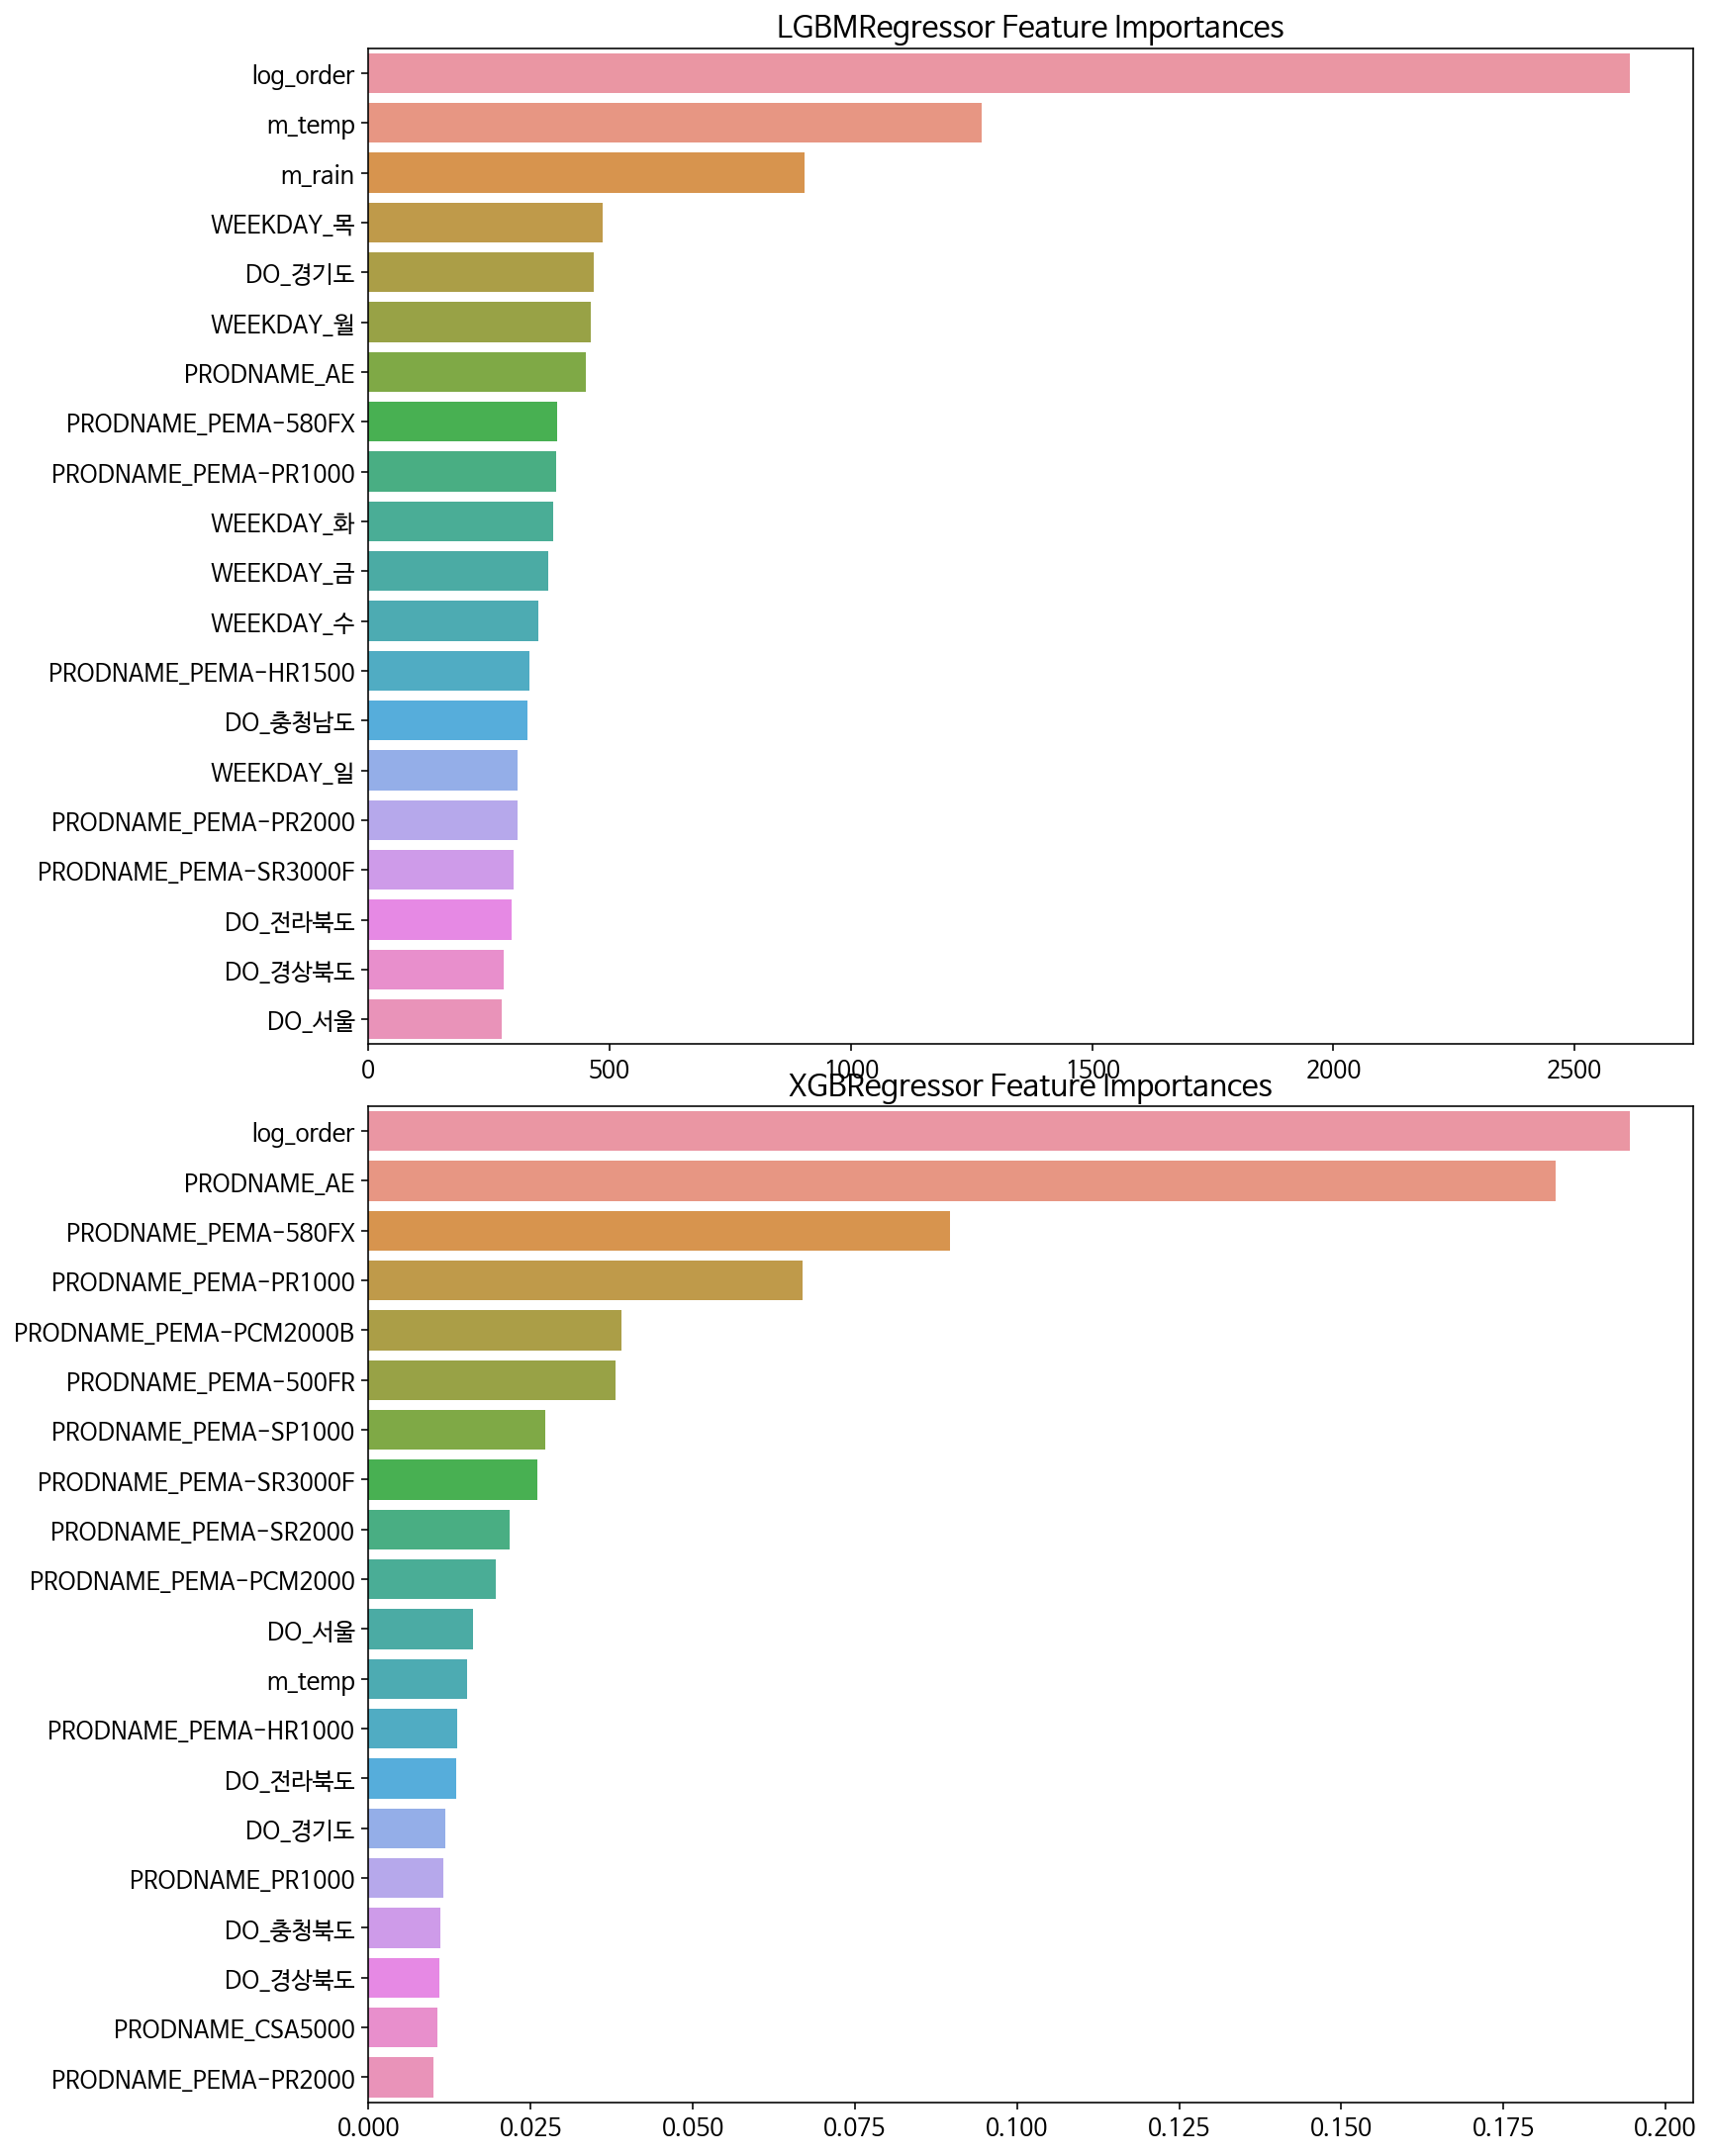

In [ ]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_t_df.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(10,15),nrows=2, ncols=1,constrained_layout=False)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=15)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(12)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])
  
models = [best_xgb,best_lgbm]
visualize_ftr_importances(models)

#- 결과 -
- 최종 혼합 모델의 RMSLE: 0.18725357566374687

- XGBM 모델의 RMSLE: 0.18619963945994697

- LGBM 모델의 RMSLE: 0.19141774892271907

- 혼합: Variance score : 0.887

- XGBM: Variance score : 0.889

- LGBM: Variance score : 0.882 

In [ ]:
# 실제값 예측값 차이 체크
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(xgb_pred)
df1.reset_index(inplace=True)
df1 =pd.concat([df1,df2],axis=1)
d1 = df1.rename({'log_sold':'True_values',0:'Prediced_values'},axis='columns')

In [ ]:
# 로그화된 실제수주량 원복
df3 = np.expm1(d1.True_values)
df4 = np.expm1(d1.Prediced_values)

In [ ]:
# 실제수주량과 모델에서 생성된 예측값과의 차이
df3 = pd.DataFrame(df3)
df4 = pd.DataFrame(df4)
df5 =pd.concat([df3,df4],axis=1)
df5